## Observations and Insights 

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from spicy.stats import lineregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

# Combine the data into a single dataset
merged_df= pd.merge(mouse_metadata, study_results,on= ["Mouse ID"])
# Display the data table for preview
merged_df.head()
#rename tumor volume
merged_df=merged_df.rename(columns={"Tumor Volume (mm3)":"Volume"})
merged_df.tail()
#merged_df.info()


ModuleNotFoundError: No module named 'spicy'

In [166]:
# Checking the number of mice.
mouse_count=merged_df["Mouse ID"].value_counts()
mouse_count

g989    13
m957    10
a401    10
s185    10
b742    10
        ..
o848     1
d133     1
h428     1
u153     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [143]:
# Optional: Get all the data for the duplicate mouse ID. 



In [144]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [145]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_stats=merged_df.groupby("Drug Regimen").agg(\
     #Mean of the tumor volume
     Tumor_Vol_Mean=("Volume",np.mean),\
     #Median Tumor volume
     Tumor_Vol_Median=("Volume",np.median),\
     #Variance of tumor volume
     Tumor_Vol_Var=("Volume",np.var),\
     #Get standard deviation 
     Tumor_Vol_Stdev=("Volume",np.std),\
     #Get standard error measuremento 
     Tumor_Vol_SEM =("Volume",st.sem),\
                                                       ).round(3)
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_group_stats


Tumor_Vol_Mean  Tumor_Vol_Median  Tumor_Vol_Var  \
Drug Regimen                                                    
Capomulin             40.676            41.558         24.948   
Ceftamin              52.591            51.776         39.290   
Infubinol             52.885            51.821         43.129   
Ketapril              55.236            53.699         68.554   
Naftisol              54.332            52.509         66.173   
Placebo               54.034            52.289         61.168   
Propriva              52.323            50.855         42.351   
Ramicane              40.217            40.673         23.487   
Stelasyn              54.233            52.432         59.451   
Zoniferol             53.237            51.818         48.533   

              Tumor_Vol_Stdev  Tumor_Vol_SEM  
Drug Regimen                                  
Capomulin               4.995          0.329  
Ceftamin                6.268          0.470  
Infubinol               6.567          0.492  
Ketapril                8.280          0.604  
Naftisol                8.135          0.596  
Placebo                 7.821          0.581  
Propriva                6.508          0.513  
Ramicane                4.846          0.321  
Stelasyn                7.710          0.573  
Zoniferol               6.967          0.516

## Bar and Pie Charts

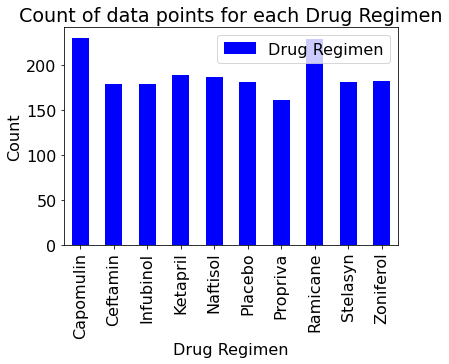

In [147]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_group=merged_df.groupby("Drug Regimen")
#Count number of data points for each drug regimen
drug_group_count=pd.DataFrame(drug_group["Drug Regimen"].count())
#Bar chart based off of group series
count_chart=drug_group_count.plot(kind="bar",title="Count of data points for each Drug Regimen",color="blue")
#set the xlabel and y-label
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
#Save the figure
plt.savefig("figures/PandaBarChart.png")

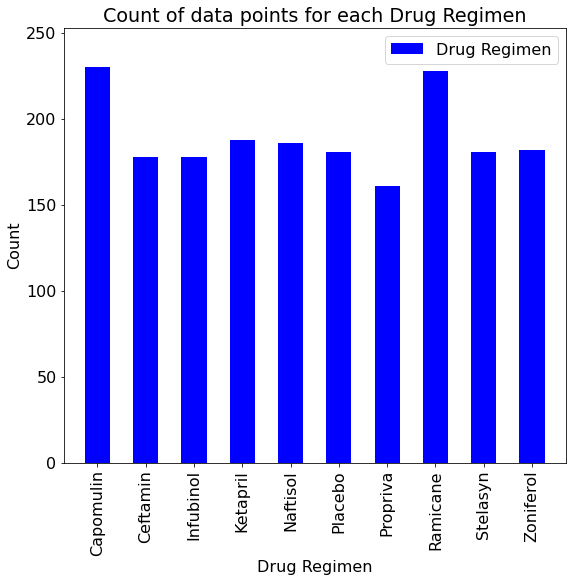

In [148]:
#bar char with matplot lib
x_axis=np.arange(len(drug_group_count))
tick_locations=[value for value in x_axis]
plt.figure(figsize=(9,8))
plt.bar(x_axis,drug_group_count["Drug Regimen"],color="blue",align="center",width=0.52)
plt.xticks(tick_locations,list(drug_group_count.index), rotation="vertical")
#set x and y limits
plt.xlim(-0.7,len(x_axis)-0.3)
#if you multiply the y lim it gives you space so that the graph is not in the margins
plt.ylim(0,max(drug_group_count["Drug Regimen"])*1.10)
#Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
column_name=["Drug Regimen"]
#auto fit the legend you can put loc="best" or by code que es 0
plt.legend(column_name,loc=0)
#save the figure
plt.savefig("figures/PyplotBarChart.png")

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=merged_df.groupby("Sex")
#gender_group.head()
#get combine data points for each gender quieres el count para male and female para hacer el pie
gender_group_count=pd.DataFrame(gender_group["Sex"].count())
#View the groupby data frame
gender_group_count.head()



Sex
Sex        
Female  935
Male    958

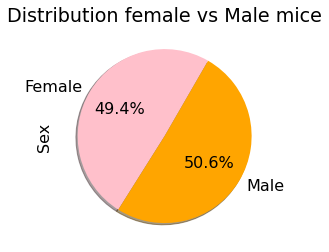

In [150]:
#create pie chart with group series
#.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)[source]

gender_group_count.plot(kind="pie",y="Sex",
                        title="Distribution female vs Male mice",
                        shadow=True,fontsize=16,colors=["pink","orange"],legend=False,autopct='%1.1f%%',startangle=60)
plt.savefig("figures/PandaPieChart.png")
                       

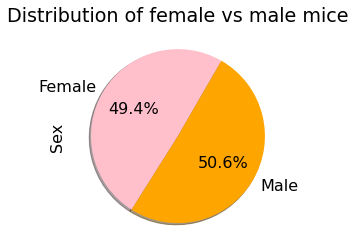

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels for pie chart from index values of the groupby data frame
genders=list(gender_group_count.index.values)
#Values of each section of the pie chart
gender_counts=gender_group_count["Sex"]
colors=["pink","orange"]
plt.pie(gender_counts,labels=genders,colors=colors,autopct="%1.1f%%",shadow="True",startangle=60)
plt.rcParams["font.size"]=16
plt.title("Distribution of female vs male mice")
plt.ylabel("Sex")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse # isin works as a filter for finding data for specific columns

four_drugs=merged_df[merged_df["Drug Regimen"].isin(four_drug_list)]
four_drugs.head()

four_last_tumor=four_drugs.groupby(["Drug Regimen","Mouse ID"]).agg(\
      last_tumor_size=("Volume",lambda x: x.iloc[-1])).round(2)
four_last_tumor                                              


last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128                38.98
             b742                38.94
             f966                30.49
             g288                37.07
             g316                40.16
...                                ...
Ramicane     s508                30.28
             u196                40.67
             w678                43.17
             y449                44.18
             z578                30.64

[100 rows x 1 columns]

In [153]:
#Unstack en level 0 que es es la column numero uno y te la va a poenr como row
four_last_tumor_unstacked=four_last_tumor.stack(level=0).unstack(level=0)
four_last_tumor_unstacked.head()

Drug Regimen              Capomulin  Ceftamin  Infubinol  Ramicane
Mouse ID                                                          
a203     last_tumor_size        NaN       NaN      67.97       NaN
a251     last_tumor_size        NaN       NaN      65.53       NaN
a275     last_tumor_size        NaN      63.0        NaN       NaN
a411     last_tumor_size        NaN       NaN        NaN     38.41
a444     last_tumor_size        NaN       NaN        NaN     43.05

In [154]:
# Put treatments into a list for for loop (and later for plot labels)
counter=0
for drug in four_drug_list:
    quartiles=four_last_tumor_unstacked[drug].quantile([.25,.5,.75]).round(2)
    lowerq=quartiles[0.25].round(2)
    upperq=quartiles[0.75].round(2)
    iqr=round(upperq-lowerq,2)
    lower_bound=round(lowerq-(1.5*iqr),2)
    upper_bound=round(upperq+(1.5*iqr),2)
    
    if counter==0:
        print(f"---------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

    

---------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for 

Box and Whiskers 


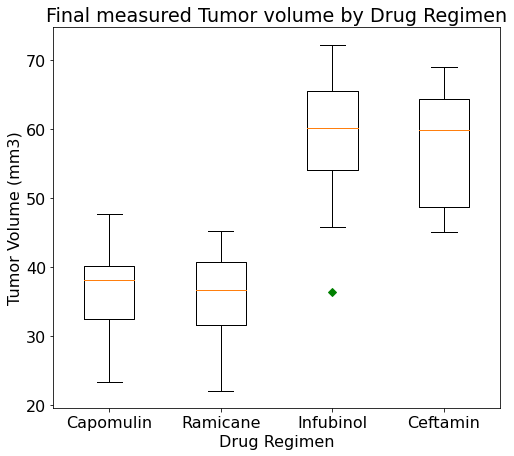

In [155]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list=[]
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstacked[drug].dropna()))
fig1,ax=plt.subplots(figsize=(8,7))
ax.set_title("Final measured Tumor volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(boxplot_list,notch=0,sym="gD")
plt.xticks([1,2,3,4],four_drug_list)
plt.savefig("figures/BoxWhiskerPlot.png")
plt.show()
    

## Line and Scatter Plots

In [156]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data=merged
_df.loc[merged_df["Drug Regimen"]=="Capomulin"]
capomulin_data.head()

NameError: name 'merged' is not defined

In [157]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_time_tumor=capomulin_data.groupby(["Timepoint"]).agg(\
                Tumor_Vol_Mean=("Volume",np.mean),\
                Tumor_Vol_SEM=("Volume",st.sem)\
                                                        ).round(2) 
#std error message
cap_time_tumor.head(15)
                         
    
    

Tumor_Vol_Mean  Tumor_Vol_SEM
Timepoint                               
0                   45.00           0.00
5                   44.27           0.45
10                  43.08           0.70
15                  42.06           0.84
20                  40.72           0.91
25                  39.94           0.88
30                  38.77           0.93
35                  37.82           1.05
40                  36.96           1.22
45                  36.24           1.22

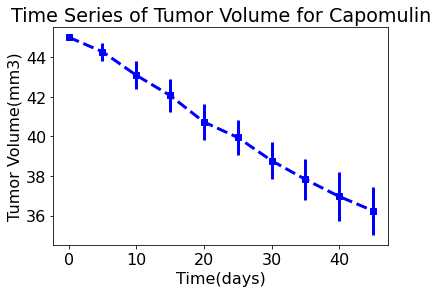

In [158]:
time_span=list(cap_time_tumor.index.values)
plt.errorbar(time_span,#x axis
            cap_time_tumor["Tumor_Vol_Mean"],# y axis
            yerr=cap_time_tumor["Tumor_Vol_SEM"],#y errors
            label="Time Series of Tumor Volume for Capomulin",
            fmt="bs--",#fromat line with dashed lines
            linewidth=3   )
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.savefig("figures/LineChart.png")
plt.show()


In [159]:
capomulin_data.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

       Volume  Metastatic Sites  
10  45.000000                 0  
11  43.878496                 0  
12  37.614948                 0  
13  38.177232                 0  
14  36.866876                 0

In [160]:
cap_mouse_id=capomulin_data.groupby(["Mouse ID"]).agg(\
       Mouse_weight=("Weight (g)",np.mean),\
       Tumor_vol_mean=("Volume",np.mean)\
).round(2)
cap_mouse_id.head(31)

Mouse_weight  Tumor_vol_mean
Mouse ID                              
b128                22           41.96
b742                21           40.08
f966                17           36.51
g288                19           41.99
g316                22           44.61
i557                24           44.81
i738                20           39.14
j119                23           44.47
j246                21           43.22
l509                21           44.43
l897                19           42.51
m601                17           34.85
m957                19           39.05
r157                25           45.80
r554                17           36.51
r944                25           43.37
s185                17           34.56
s710                23           42.80
t565                17           39.33
u364                17           39.89
v923                21           41.58
w150                23           41.38
w914                21           41.35
x401                15           36.18
y793                17           38.51

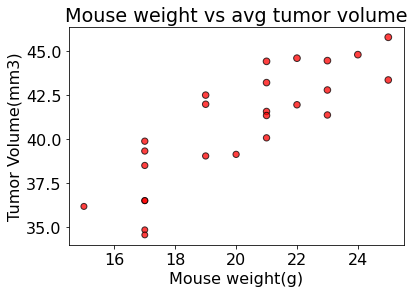

In [161]:
plt.scatter(
    cap_mouse_id["Mouse_weight"],
    cap_mouse_id["Tumor_vol_mean"],
    marker="o",
    facecolors="red",
    edgecolors="black",
    s=cap_mouse_id["Tumor_vol_mean"],
    alpha=.75)
plt.title("Mouse weight vs avg tumor volume")
plt.xlabel("Mouse weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.savefig("figures/Scatterweighttumorvol.png")
plt.show()





## Correlation and Regression

In [162]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [163]:
correlation=st.pearsonr(cap_mouse_id["Mouse_weight"],cap_mouse_id["Tumor_vol_mean"])
print(f"The correlation between the factors is {round(correlation[0],2)}")


The correlation between the factors is 0.84


The r-squared is: 0.8418558779004007
The equation of the regression line is: y = 0.95x + 21.56


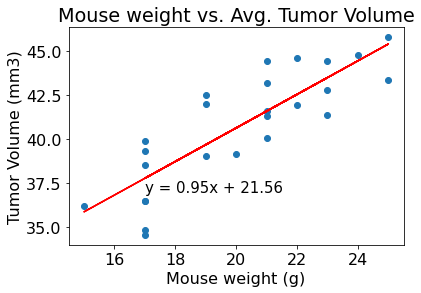

In [168]:
#print r squared
x_values=cap_mouse_id["Mouse_weight"]
y_values=cap_mouse_id["Tumor_vol_mean"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
plt.savefig("figures/ScatterWeightTumorVolRegression.png")

plt.show()